In [1]:
# 데이터 처리
import numpy as np
import pandas as pd

In [2]:
import geopandas as gpd

import fiona #공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리 
from fiona.crs import from_epsg # 좌표변환 

#import pyproj  # 좌표변환
#from pyproj import Proj, transform

# import shapely
# from shapely.geometry.multipolygon import MultiPolygon 
# from shapely.geometry import LineString, Point
# from shapely import wkt

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid') #whitegrid, dark, white, ticks
mpl.rc('font', family='NanumGothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (16,4.5) #차트 사이즈

In [4]:
# "전국CCTV표준데이터" CSV 파일 로딩 
df_cctv = pd.read_csv('./data/전국CCTV표준데이터.csv', encoding="EUC-KR", header=0, 
                           names=['admin_nm', 'addr_rd', 'addr_jb', 'purpose', 'cctv_cnt', 'pixel', 'direction', 'period', 'date_install', 'tel', 'lat', 'lon', 'date_make', 'offer_admin_cd', 'offer_admin_nm'], 
                           dtype={'cctv_cnt':object, 'pixel':object, 'period':object, 'lat':float, 'lon':float, 'offer_admin_cd':object}, 
                  thousands = ',', #천단위 쉼표 제거   
                  index_col=None) 

In [5]:
df_cctv.dropna(subset=['lat'],axis=0,inplace=True)  # null 삭제
df_cctv.dropna(subset=['lon'],axis=0,inplace=True)  # null 삭제

In [6]:
df_cctv.head()

admin_nm addr_rd               addr_jb purpose cctv_cnt pixel direction  \
0  경상남도 김해시청     NaN  경상남도 김해시 구산동 1072-19    생활방범        3   200     현대병원뒤   
1  경상남도 김해시청     NaN   경상남도 김해시 구산동 305-15    생활방범        2   200     목화골공원   
2  경상남도 김해시청     NaN  경상남도 김해시 삼계동 1484-14    생활방범        2   200      정원빌라   
3  경상남도 김해시청     NaN     경상남도 김해시 구산동 1043    생활방범        4   200     최가아구찜   
4  경상남도 김해시청     NaN   경상남도 김해시 구산동 175-10    생활방범        2   200      동호맨션   

  period date_install           tel        lat         lon   date_make  \
0     30      2019-11  055-330-4741  35.249247  128.871639  2019-06-26   
1     30      2019-12  055-330-4741  35.247411  128.873605  2019-06-26   
2     30      2019-06  055-330-4741  35.261728  128.874144  2019-06-26   
3     30      2019-05  055-330-4741  35.247076  128.872461  2019-06-26   
4     30      2019-12  055-330-4741  35.241185  128.877334  2019-06-26   

  offer_admin_cd offer_admin_nm  
0        5350000       경상남도 김해시  
1        5350000       경상남도 김해시  
2        5350000       경상남도 김해시  
3        5350000       경상남도 김해시  
4        5350000       경상남도 김해시

In [7]:
df_cctv_sl2 = df_cctv[ df_cctv['admin_nm'].str.contains('서대문구') == True  ]
df_cctv_sl2.info()
df_cctv_sl2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 2187 to 32891
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   admin_nm        495 non-null    object 
 1   addr_rd         471 non-null    object 
 2   addr_jb         469 non-null    object 
 3   purpose         495 non-null    object 
 4   cctv_cnt        495 non-null    object 
 5   pixel           0 non-null      object 
 6   direction       0 non-null      object 
 7   period          495 non-null    object 
 8   date_install    495 non-null    object 
 9   tel             495 non-null    object 
 10  lat             495 non-null    float64
 11  lon             495 non-null    float64
 12  date_make       495 non-null    object 
 13  offer_admin_cd  495 non-null    object 
 14  offer_admin_nm  495 non-null    object 
dtypes: float64(2), object(13)
memory usage: 61.9+ KB


admin_nm                addr_rd                 addr_jb purpose  \
2187  서울특별시 서대문구청  서울특별시 서대문구 북아현로4자길 19  서울특별시 서대문구 북아현동 113-14    생활방범   
2188  서울특별시 서대문구청   서울특별시 서대문구 연세로2나길 61     서울특별시 서대문구 창천동 4-61    생활방범   
2189  서울특별시 서대문구청   서울특별시 서대문구 연세로2나길 20    서울특별시 서대문구 창천동 13-68    생활방범   
2190  서울특별시 서대문구청     서울특별시 서대문구 신촌로7길 5    서울특별시 서대문구 창천동 502-7    생활방범   
2191  서울특별시 서대문구청  서울특별시 서대문구 연희로15길 103    서울특별시 서대문구 연희동 109-1    생활방범   

     cctv_cnt pixel direction period date_install          tel        lat  \
2187        4   NaN       NaN     30      2020-05  02-330-9012  37.561256   
2188        4   NaN       NaN     30      2020-05  02-330-9013  37.558090   
2189        5   NaN       NaN     30      2020-05  02-330-9014  37.556945   
2190        5   NaN       NaN     30      2020-05  02-330-9015  37.557604   
2191        5   NaN       NaN     30      2020-05  02-330-9016  37.571599   

             lon   date_make offer_admin_cd offer_admin_nm  
2187  126.959493  2020-05-22        3120000     서울특별시 서대문구  
2188  126.940082  2020-05-22        3120000     서울특별시 서대문구  
2189  126.938226  2020-05-22        3120000     서울특별시 서대문구  
2190  126.931355  2020-05-22        3120000     서울특별시 서대문구  
2191  126.928017  2020-05-22        3120000     서울특별시 서대문구

In [8]:
# 좌표 속성을 가지고 지오메트리 데이터를 생성
geom_cctv_sl01 = gpd.points_from_xy(df_cctv_sl2.lon, df_cctv_sl2.lat)
geom_cctv_sl01[0:3]

<GeometryArray>
Length: 3, dtype: geometry

In [9]:
# 기존의 데이터프레임 컬럼명을 가져옴 
columns = df_cctv_sl2.columns

In [10]:
# 속성 데이터프레임에 Geometry를 붙여서 공간 데이터프레임을 생성 
gdf_cctv_sl01 = gpd.GeoDataFrame(df_cctv_sl2[columns], geometry=geom_cctv_sl01, crs=from_epsg(4326))
gdf_cctv_sl01.head()

C:\Users\dhl\AppData\Roaming\Python\Python38\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


admin_nm                addr_rd                 addr_jb purpose  \
2187  서울특별시 서대문구청  서울특별시 서대문구 북아현로4자길 19  서울특별시 서대문구 북아현동 113-14    생활방범   
2188  서울특별시 서대문구청   서울특별시 서대문구 연세로2나길 61     서울특별시 서대문구 창천동 4-61    생활방범   
2189  서울특별시 서대문구청   서울특별시 서대문구 연세로2나길 20    서울특별시 서대문구 창천동 13-68    생활방범   
2190  서울특별시 서대문구청     서울특별시 서대문구 신촌로7길 5    서울특별시 서대문구 창천동 502-7    생활방범   
2191  서울특별시 서대문구청  서울특별시 서대문구 연희로15길 103    서울특별시 서대문구 연희동 109-1    생활방범   

     cctv_cnt pixel direction period date_install          tel        lat  \
2187        4   NaN       NaN     30      2020-05  02-330-9012  37.561256   
2188        4   NaN       NaN     30      2020-05  02-330-9013  37.558090   
2189        5   NaN       NaN     30      2020-05  02-330-9014  37.556945   
2190        5   NaN       NaN     30      2020-05  02-330-9015  37.557604   
2191        5   NaN       NaN     30      2020-05  02-330-9016  37.571599   

             lon   date_make offer_admin_cd offer_admin_nm  \
2187  126.959493  2020-05-22        3120000     서울특별시 서대문구   
2188  126.940082  2020-05-22        3120000     서울특별시 서대문구   
2189  126.938226  2020-05-22        3120000     서울특별시 서대문구   
2190  126.931355  2020-05-22        3120000     서울특별시 서대문구   
2191  126.928017  2020-05-22        3120000     서울특별시 서대문구   

                        geometry  
2187  POINT (126.95949 37.56126)  
2188  POINT (126.94008 37.55809)  
2189  POINT (126.93823 37.55695)  
2190  POINT (126.93135 37.55760)  
2191  POINT (126.92802 37.57160)

In [11]:
# Geometry를 이용하여 X, Y 좌표 항목을 생성 
gdf_cctv_sl01["x"] = gdf_cctv_sl01.geometry.x
gdf_cctv_sl01["y"] = gdf_cctv_sl01.geometry.y
gdf_cctv_sl01.head()

admin_nm                addr_rd                 addr_jb purpose  \
2187  서울특별시 서대문구청  서울특별시 서대문구 북아현로4자길 19  서울특별시 서대문구 북아현동 113-14    생활방범   
2188  서울특별시 서대문구청   서울특별시 서대문구 연세로2나길 61     서울특별시 서대문구 창천동 4-61    생활방범   
2189  서울특별시 서대문구청   서울특별시 서대문구 연세로2나길 20    서울특별시 서대문구 창천동 13-68    생활방범   
2190  서울특별시 서대문구청     서울특별시 서대문구 신촌로7길 5    서울특별시 서대문구 창천동 502-7    생활방범   
2191  서울특별시 서대문구청  서울특별시 서대문구 연희로15길 103    서울특별시 서대문구 연희동 109-1    생활방범   

     cctv_cnt pixel direction period date_install          tel        lat  \
2187        4   NaN       NaN     30      2020-05  02-330-9012  37.561256   
2188        4   NaN       NaN     30      2020-05  02-330-9013  37.558090   
2189        5   NaN       NaN     30      2020-05  02-330-9014  37.556945   
2190        5   NaN       NaN     30      2020-05  02-330-9015  37.557604   
2191        5   NaN       NaN     30      2020-05  02-330-9016  37.571599   

             lon   date_make offer_admin_cd offer_admin_nm  \
2187  126.959493  2020-05-22        3120000     서울특별시 서대문구   
2188  126.940082  2020-05-22        3120000     서울특별시 서대문구   
2189  126.938226  2020-05-22        3120000     서울특별시 서대문구   
2190  126.931355  2020-05-22        3120000     서울특별시 서대문구   
2191  126.928017  2020-05-22        3120000     서울특별시 서대문구   

                        geometry           x          y  
2187  POINT (126.95949 37.56126)  126.959493  37.561256  
2188  POINT (126.94008 37.55809)  126.940082  37.558090  
2189  POINT (126.93823 37.55695)  126.938226  37.556945  
2190  POINT (126.93135 37.55760)  126.931355  37.557604  
2191  POINT (126.92802 37.57160)  126.928017  37.571599

In [12]:
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as ctx  #TMS 타일맵 지원 라이브러리

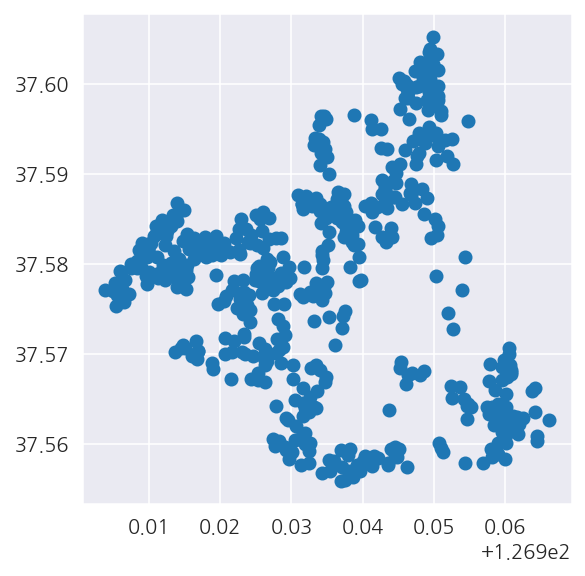

In [13]:
gdf_cctv_sl01.plot() #ax=ax, color='red')
plt.show()

## Buffer

버퍼 데이터는 직각평면좌표 상태에서 만드는 것을 권장

In [14]:
# 좌표계 변환
gdf_cctv_sl01_3857 = gdf_cctv_sl01.to_crs(epsg=3857) 

In [15]:
# 버퍼 데이터 생성
gdf_buf = gpd.GeoDataFrame()
gdf_buf['geometry'] = gdf_cctv_sl01_3857.buffer(50) # 반경거리(m)
gdf_buf = gpd.GeoDataFrame(gdf_cctv_sl01_3857[columns], geometry=gdf_buf.geometry, crs=from_epsg(3857))
gdf_buf.info()
gdf_buf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 495 entries, 2187 to 32891
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   admin_nm        495 non-null    object  
 1   addr_rd         471 non-null    object  
 2   addr_jb         469 non-null    object  
 3   purpose         495 non-null    object  
 4   cctv_cnt        495 non-null    object  
 5   pixel           0 non-null      object  
 6   direction       0 non-null      object  
 7   period          495 non-null    object  
 8   date_install    495 non-null    object  
 9   tel             495 non-null    object  
 10  lat             495 non-null    float64 
 11  lon             495 non-null    float64 
 12  date_make       495 non-null    object  
 13  offer_admin_cd  495 non-null    object  
 14  offer_admin_nm  495 non-null    object  
 15  geometry        495 non-null    geometry
dtypes: float64(2), geometry(1), object(13)
memory usa

C:\Users\dhl\AppData\Roaming\Python\Python38\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


admin_nm                addr_rd                 addr_jb purpose  \
2187  서울특별시 서대문구청  서울특별시 서대문구 북아현로4자길 19  서울특별시 서대문구 북아현동 113-14    생활방범   
2188  서울특별시 서대문구청   서울특별시 서대문구 연세로2나길 61     서울특별시 서대문구 창천동 4-61    생활방범   
2189  서울특별시 서대문구청   서울특별시 서대문구 연세로2나길 20    서울특별시 서대문구 창천동 13-68    생활방범   
2190  서울특별시 서대문구청     서울특별시 서대문구 신촌로7길 5    서울특별시 서대문구 창천동 502-7    생활방범   
2191  서울특별시 서대문구청  서울특별시 서대문구 연희로15길 103    서울특별시 서대문구 연희동 109-1    생활방범   

     cctv_cnt pixel direction period date_install          tel        lat  \
2187        4   NaN       NaN     30      2020-05  02-330-9012  37.561256   
2188        4   NaN       NaN     30      2020-05  02-330-9013  37.558090   
2189        5   NaN       NaN     30      2020-05  02-330-9014  37.556945   
2190        5   NaN       NaN     30      2020-05  02-330-9015  37.557604   
2191        5   NaN       NaN     30      2020-05  02-330-9016  37.571599   

             lon   date_make offer_admin_cd offer_admin_nm  \
2187  126.959493  2020-05-22        3120000     서울특별시 서대문구   
2188  126.940082  2020-05-22        3120000     서울특별시 서대문구   
2189  126.938226  2020-05-22        3120000     서울특별시 서대문구   
2190  126.931355  2020-05-22        3120000     서울특별시 서대문구   
2191  126.928017  2020-05-22        3120000     서울특별시 서대문구   

                                               geometry  
2187  POLYGON ((14133116.079 4517630.126, 14133115.8...  
2188  POLYGON ((14130955.323 4517185.531, 14130955.0...  
2189  POLYGON ((14130748.658 4517024.717, 14130748.4...  
2190  POLYGON ((14129983.760 4517117.230, 14129983.5...  
2191  POLYGON ((14129612.264 4519082.693, 14129612.0...

<AxesSubplot:>

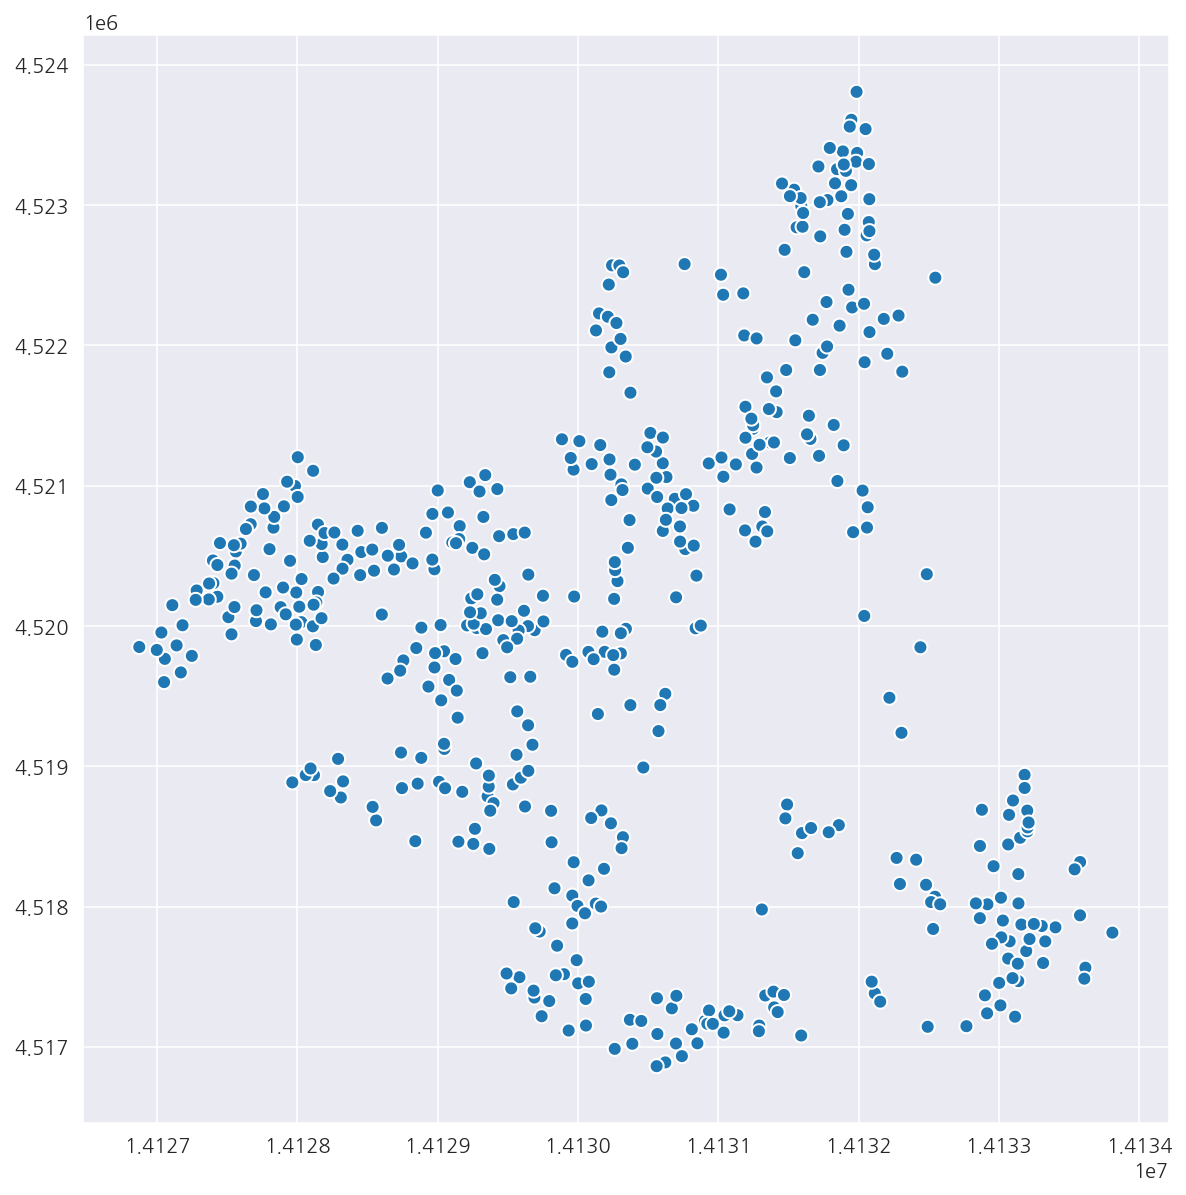

In [16]:
gdf_buf.plot(figsize=(10,10))

In [17]:
# 버퍼 좌표계 변환
gdf_buf4326 = gdf_buf.to_crs(epsg=4326) 

<AxesSubplot:>

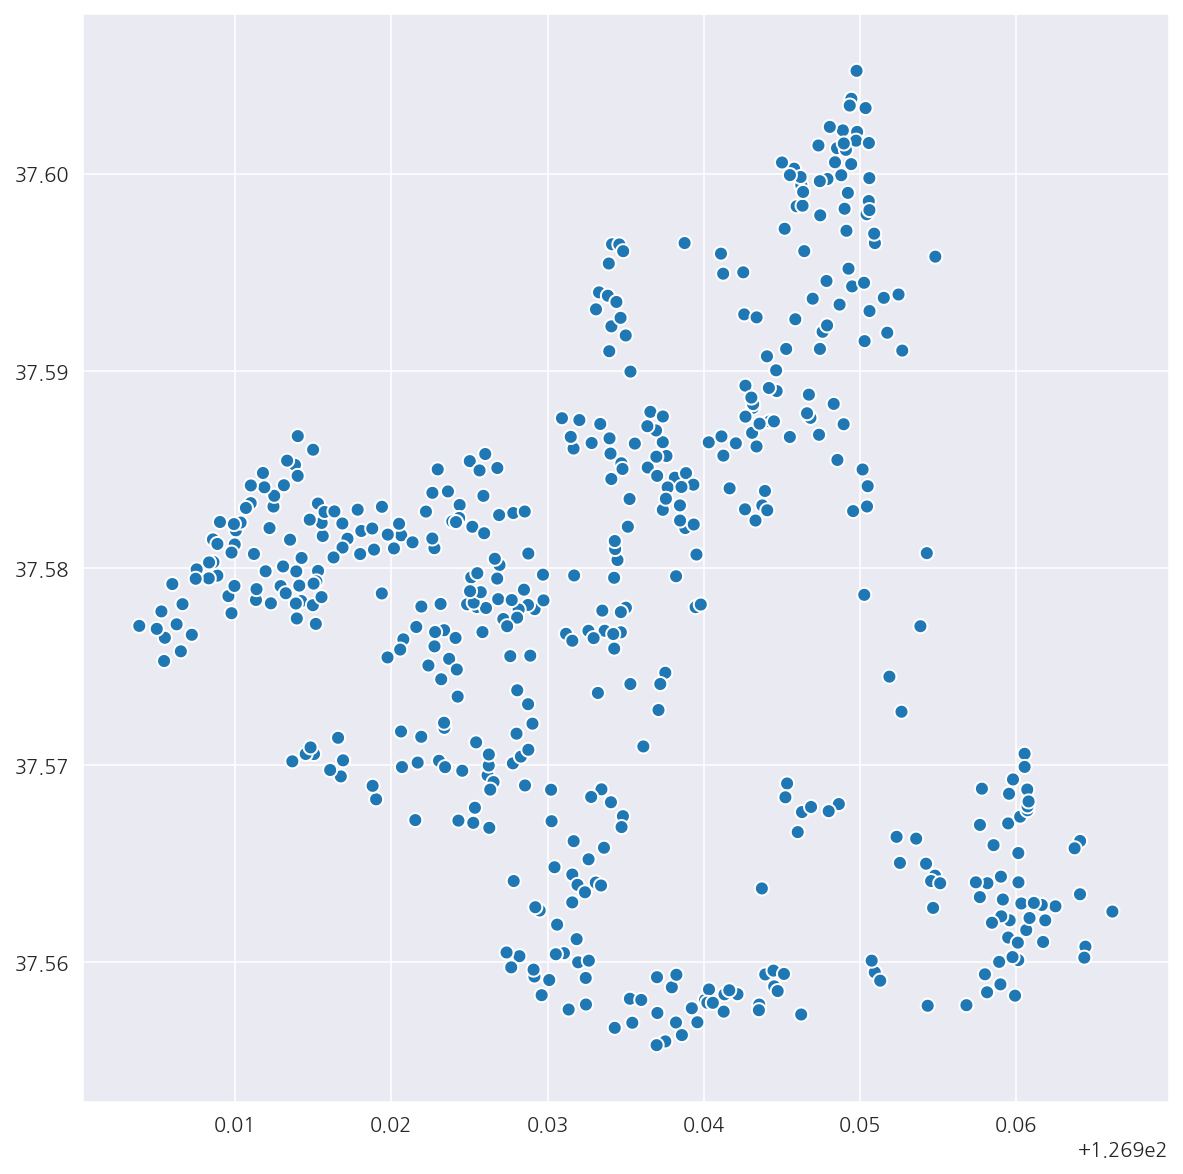

In [18]:
gdf_buf4326.plot(figsize=(10,10))

In [19]:
tms_vworld_g = 'http://xdworld.vworld.kr:8080/2d/gray/service/{z}/{x}/{y}.png'
tms_vworld_m = "http://xdworld.vworld.kr:8080/2d/midnight/service/{z}/{x}/{y}.png"
tms_stamen_t = 'http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'

def add_basemap(ax, zoom, url):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, source=url)  
    ax.imshow(basemap, extent=(xmin, xmax, ymax, ymin ), interpolation='bilinear')  
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))  #xmin, xmax, ymin, ymax

C:\Users\dhl\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


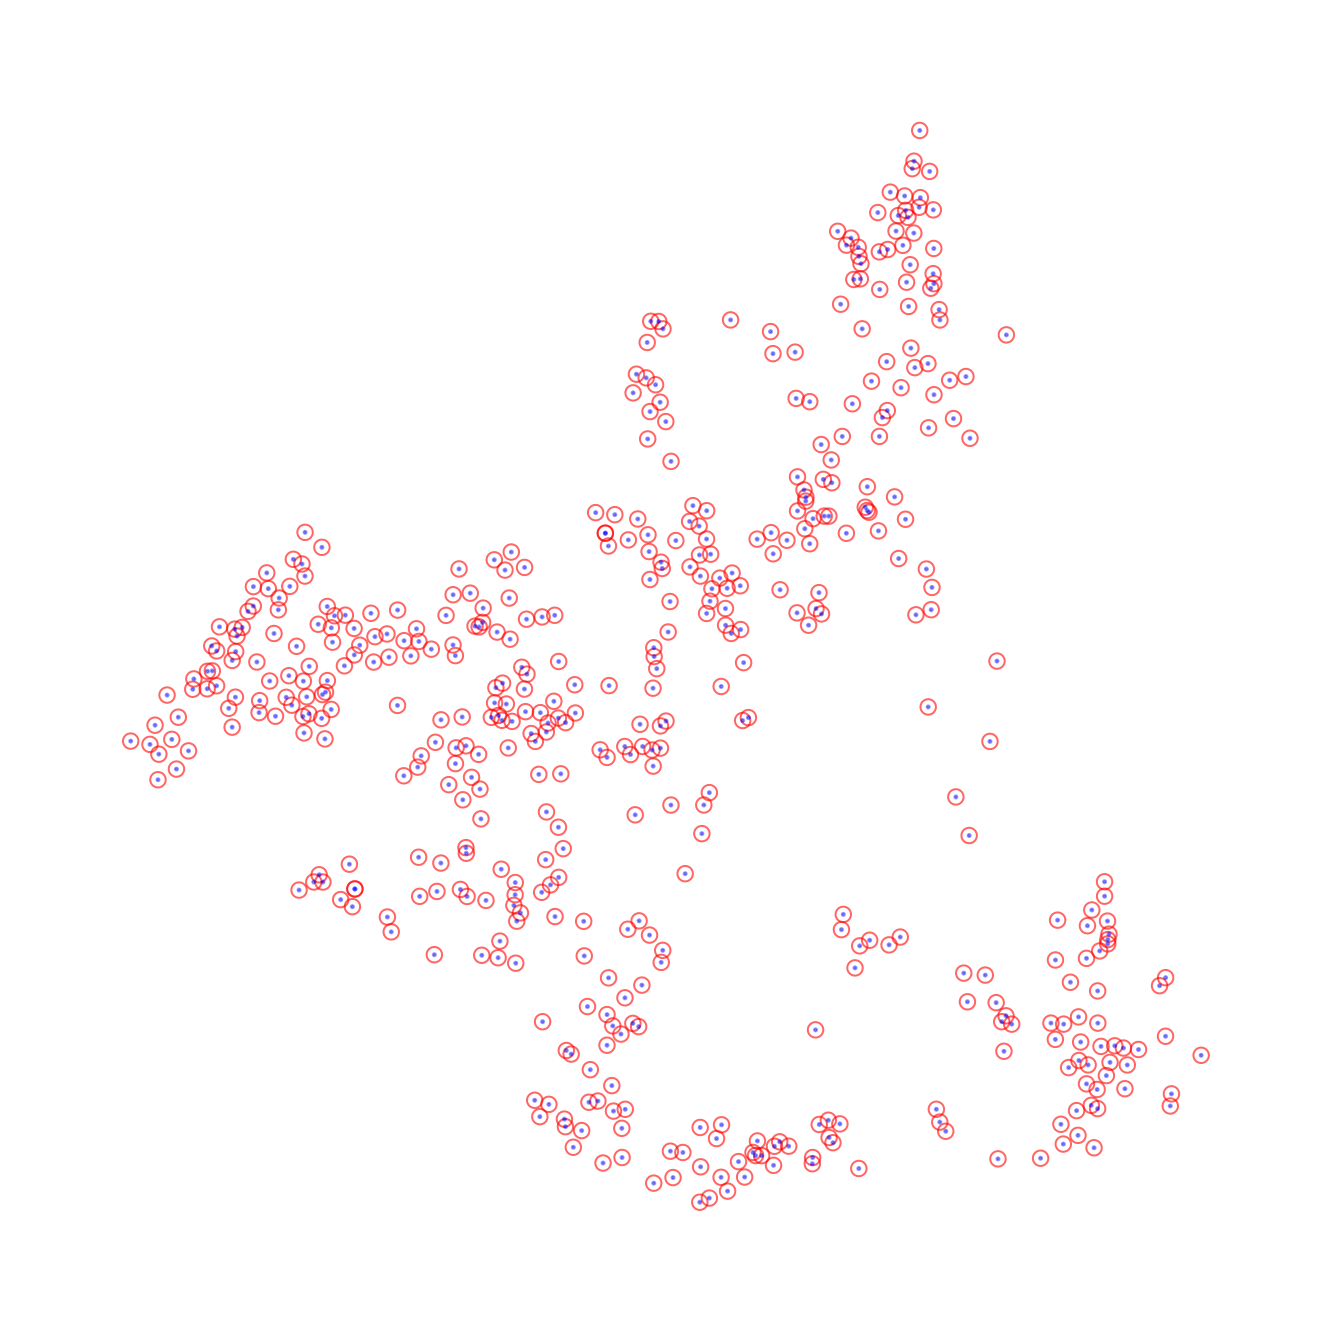

In [20]:
ax = gplt.pointplot(gdf_cctv_sl01, s=1.5, color='blue', alpha=0.4, projection=gcrs.WebMercator(), figsize=(12, 12))
gplt.polyplot(gdf_buf4326, facecolor='none', edgecolor='red', linestyle='-', linewidth=1, projection=gcrs.WebMercator(), alpha=0.6, ax=ax)  

fig = plt.gcf()

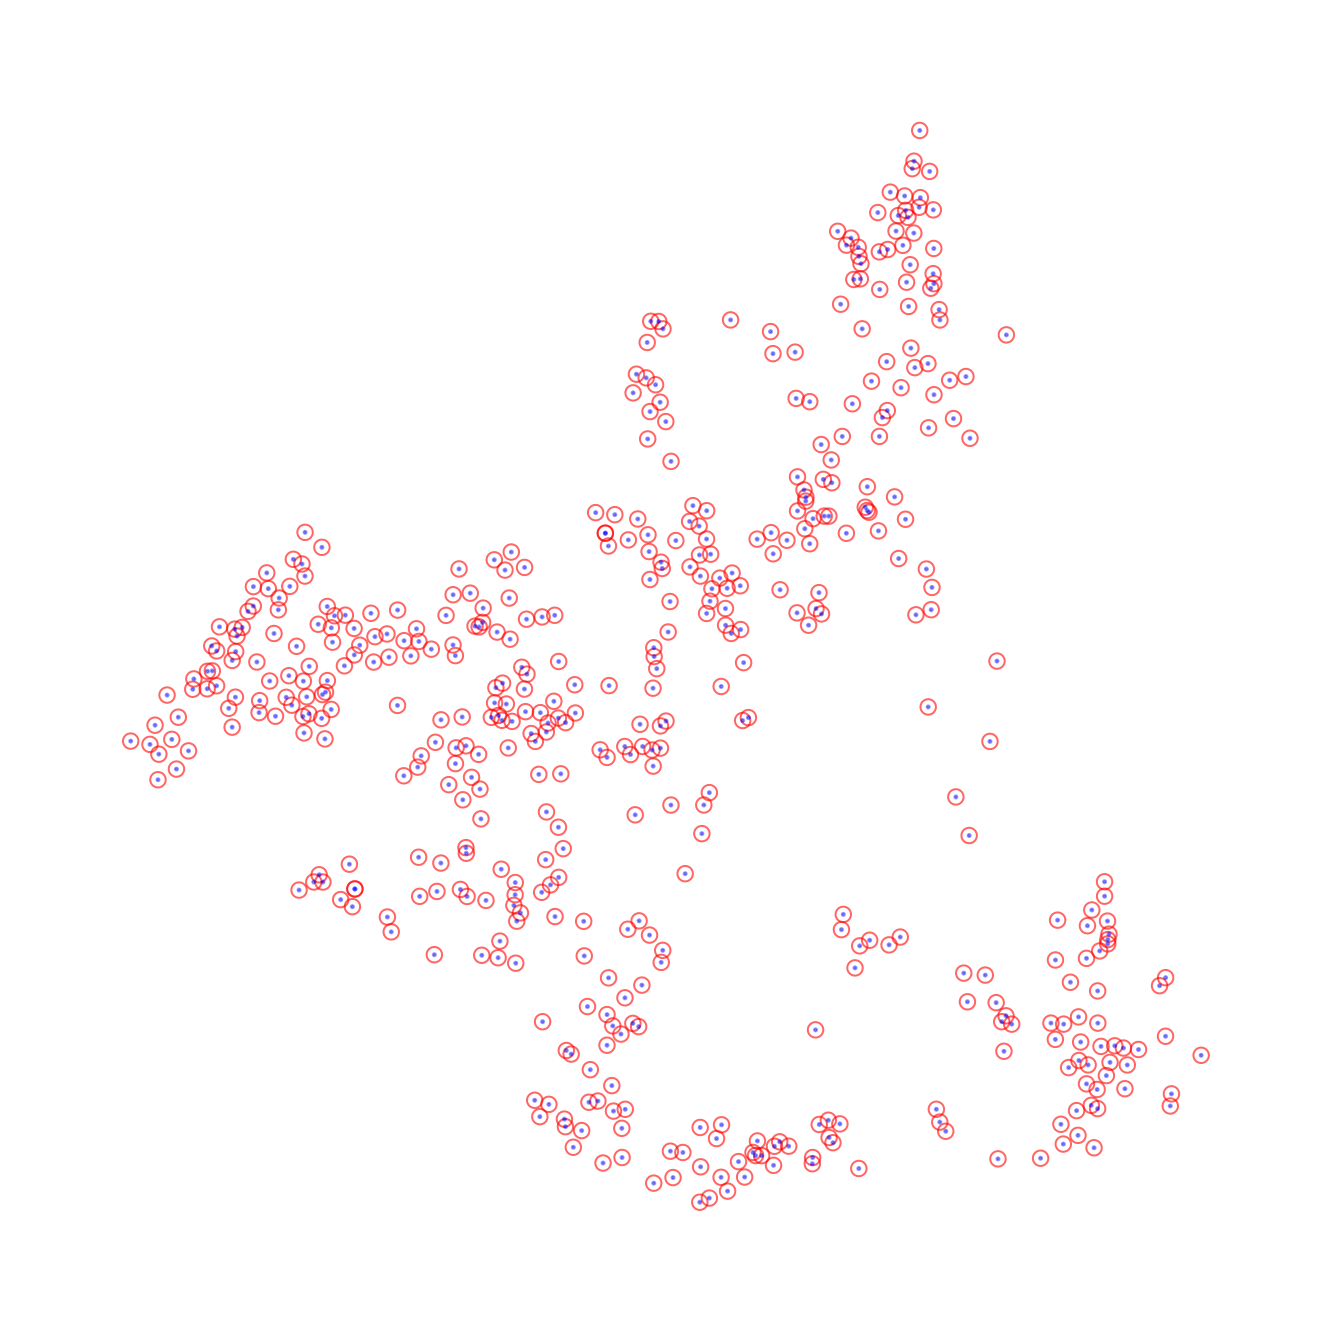

In [21]:
ax = gplt.pointplot(gdf_cctv_sl01, s=1.5, color='blue', alpha=0.4, projection=gcrs.WebMercator(), figsize=(12, 12))
gplt.polyplot(gdf_buf4326, facecolor='none', edgecolor='red', linestyle='-', linewidth=1, projection=gcrs.WebMercator(), alpha=0.6, ax=ax)  

fig = plt.gcf()

In [22]:
import folium

In [23]:
# Initialize the map:
attr = ('&copy; <a href="http://xdworld.vworld.kr">브이월드</a> ')
tiles = "http://xdworld.vworld.kr:8080/2d/gray/service/{z}/{x}/{y}.png"   #gray / midnight

In [24]:
name = list(gdf_cctv_sl01['purpose'])
lat = list(gdf_cctv_sl01['lat'])
lng = list(gdf_cctv_sl01['lon'])

In [25]:
m = folium.Map(location=[37.58, 126.94], tiles=tiles, attr=attr, zoom_start=13)

for i in range(len(name)): 
    folium.Marker( 
        location = [lat[i],lng[i]], 
        popup= name[i], 
        icon=folium.Icon(color='cadetblue',icon='ok') 
    ).add_to(m)
    
m

In [26]:
m = folium.Map(location=[37.58, 126.94], tiles=tiles, attr=attr, zoom_start=13)

for i in range(len(name)): 
    folium.Circle( 
        radius=50, 
        location = [lat[i],lng[i]], 
        popup= name[i], 
        color="crimson",
        fill=False,
    ).add_to(m)
    
m

In [27]:
m = folium.Map(location=[37.58, 126.94], tiles=tiles, attr=attr, zoom_start=13)

for i in range(len(name)): 
    folium.CircleMarker( 
        location = [lat[i],lng[i]], 
        radius=10,
        popup= name[i], 
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(m)
    
m

In [28]:
gdf_buf4326.to_file("./data/gdf_buf4326.geojson",driver='GeoJSON')
import json

with open('./data/gdf_buf4326.geojson', encoding='utf-8') as f:
    gjson_cctv = json.load(f)

In [29]:
m = folium.Map(location=[37.58, 126.94], tiles=tiles, attr=attr, zoom_start=15)

# Point Icon
for i in range(len(name)): 
    folium.Marker( 
        location = [lat[i],lng[i]], 
        popup= name[i], 
        icon=folium.Icon(color='darkblue',icon='camera') 
    ).add_to(m)

# Polygon GeoJson     
folium.GeoJson(gjson_cctv, name="geojson").add_to(m)    
    
m

### 참조   
https://python-visualization.github.io/folium/quickstart.html  

아이콘 색상 및 모양   
https://mkjjo.github.io/python/2019/08/11/folium.html

https://fontawesome.com/icons?d=gallery

## Dissolve

In [30]:
# shp 로딩
gdf_dong = gpd.read_file('./data/gdf_dong.shp', encoding='utf-8')  #euc-kr, euckr, utf-8, cp949 중 선택
gdf_dong.crs  #좌표계 확인용 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
gdf_dong.head()

OBJECTID         adm_nm   adm_cd     adm_cd2    sgg sido sidonm sggnm  \
0         1  서울특별시 종로구 사직동  1101053  1111053000  11110   11  서울특별시   종로구   
1         2  서울특별시 종로구 삼청동  1101054  1111054000  11110   11  서울특별시   종로구   
2         3  서울특별시 종로구 부암동  1101055  1111055000  11110   11  서울특별시   종로구   
3         4  서울특별시 종로구 평창동  1101056  1111056000  11110   11  서울특별시   종로구   
4         5  서울특별시 종로구 무악동  1101057  1111057000  11110   11  서울특별시   종로구   

                                            geometry  
0  POLYGON ((126.97689 37.57565, 126.97703 37.569...  
1  POLYGON ((126.98269 37.59507, 126.98337 37.594...  
2  POLYGON ((126.97585 37.59656, 126.97359 37.593...  
3  POLYGON ((126.97507 37.63139, 126.97649 37.630...  
4  POLYGON ((126.96067 37.58080, 126.96281 37.579...

<AxesSubplot:>

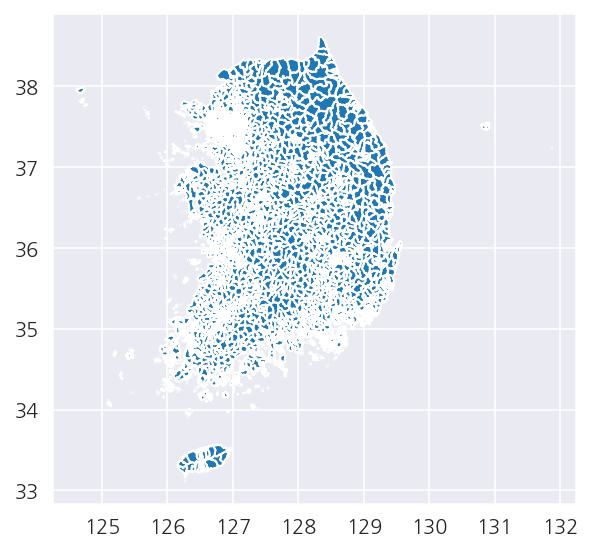

In [32]:
gdf_dong.plot()

In [33]:
gdf_dong_sl = gdf_dong[ gdf_dong.sido == '11' ]

In [34]:
# 시군구(sgg) 코드로 Dissolve
gdf_gu_sl = gdf_dong_sl.dissolve(by='sgg')

<AxesSubplot:>

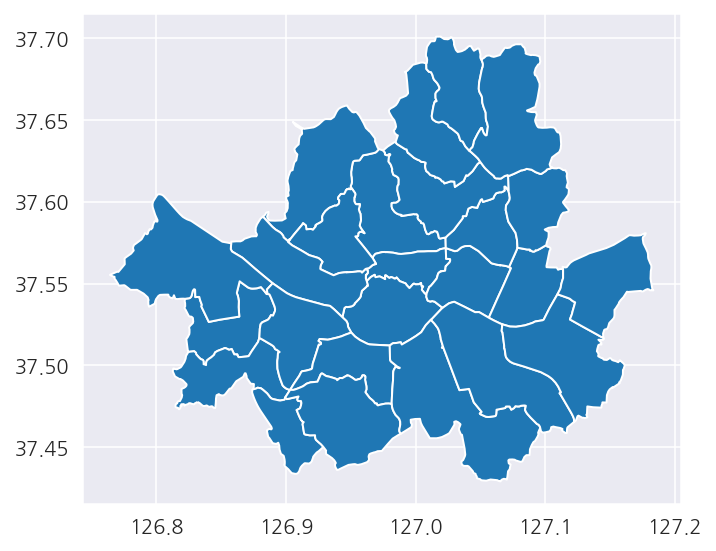

In [35]:
gdf_gu_sl.plot()

## unary_union

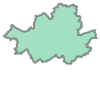

In [36]:
gdf_sl = gdf_gu_sl.geometry.unary_union
gdf_sl

- buffer : 점/선/면에 대한 버퍼 폴리곤 생성  
- dissolve : 속성 기반 도형 병합    
- unary_union : 도형 기반 병합   